<a href="https://colab.research.google.com/github/sethkipsangmutuba/Artificial-Intelligence/blob/main/Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Introduction to Object-Oriented Programming in Python

---

## Part 1: Object-Oriented Design

### Introducing Object-Oriented Programming
- Concepts of **objects**, **classes**, and **design**.

---

### Objects and Classes
- **Objects**: Entities with **state** and **behavior**.
- **Classes**: Blueprints for creating objects.

---

### Specifying Attributes and Behaviors
- **Attributes (data)**: Describe the state of objects.
- **Behaviors (methods)**: Define actions that objects can perform.

---

### Encapsulation
- Hiding details and exposing a clear **public interface**.

---

### Composition
- Building complex objects from **simpler ones**.

---

### Inheritance
- Mechanism for **code reuse** and **abstraction**.
- Includes **multiple inheritance** and its challenges.

---

### Case Study
- Practical example applying the above concepts.

---

### Summary
- Key takeaways from **object-oriented design**.

---




#  Course: ETI 2204 Object-Oriented Programming  
## Topic: Object-Oriented Design (Contextualized to Telecommunication / Information Engineering)

---

## 1. What Object-Oriented Means
- **Object-Oriented (OO)** is a paradigm where software is modeled as a collection of **objects**.  
- **Objects** = entities that combine **data (attributes/state)** + **behavior (methods/actions)**.

###  Telecom Examples:
- **Router**  
  - Attributes: `bandwidth`, `queue_size`  
  - Behaviors: `forward_packets()`, `drop_packets()`  

- **MobilePhone**  
  - Attributes: `IMEI`, `signal_strength`  
  - Behaviors: `make_call()`, `send_data()`  

OO is about thinking in terms of **systems of interacting entities**, just like **network nodes and links** in telecom.

---

## 2. Object-Oriented Design (OOD) vs. Object-Oriented Programming (OOP)

###  OOD (Design)
- Focuses on how to **structure the system conceptually**.  
- **Example**: Designing a call setup system.  
  - Identify classes: `BaseStation`, `MobilePhone`, `CallManager`.  
  - Decide how they **interact**.  

###  OOP (Programming)
- Implementation of design in a **specific language** (Python, Java, C++).  
- **Example**: Writing Python code for `class BaseStation` with method `allocate_channel()`.  

**Key difference**:  
- OOD = **blueprint (system thinking)**  
- OOP = **construction (coding)**

---

## 3. Basic Principles of Object-Oriented Design

###  Encapsulation
- Keep **internal details hidden**, provide clear **public methods**.  
- **Telecom Example**: A modem hides **error-correction logic**; user only sees `connect()`.

---

###  Abstraction
- Focus on **essential features**, ignore unnecessary details.  
- **Example**: Model a `MobilePhone` with `make_call()` without simulating every electronic circuit.

---

###  Inheritance
- New classes derive from **existing ones**.  
- **Example**: `5GBaseStation` inherits from `BaseStation` but adds `beamforming()`.

---

###  Polymorphism
- Same **interface**, different **implementations**.  
- **Example**: `send_data()` behaves differently in `WiFiDevice` vs. `CellularDevice`.

---

###  Composition
- Build complex systems by **combining objects**.  
- **Example**: A `Network` object composed of many `Router` and `Switch` objects.

---

## 4. Unified Modeling Language (UML) Basics

- **UML** = Standard visual language for describing OO systems.  

###  Common Diagrams:
- **Class diagram**: Shows classes and their relationships.  
- **Sequence diagram**: Shows interactions (e.g., call setup sequence in telecom).  

---

### When UML Isn’t Evil
- Use UML as a **communication tool** — quick sketches, not rigid paperwork.  
- **Example**: Draw a class diagram of  
  - `MobilePhone → BaseStation → Router`  
  - to explain **call routing logic**.  

Avoid overcomplicating: UML helps when it **clarifies**, but becomes "evil" if it slows you down with **bureaucracy**.

---


In [21]:
# Interactive OOP Telecom Demo (Professor Seth)
# This cell provides a single, self-contained demo that:
# - Defines OOP classes for a simple telecom model (Device, MobilePhone, BaseStation, Router)
# - Provides an interactive UI using ipywidgets when available (sliders, buttons)
# - Produces dynamic matplotlib visuals: timeline plot and device-stat bar chart
# - Falls back to a non-interactive run if ipywidgets is not installed
#
# NOTE: To get full interactivity, run this in a local Jupyter environment with:
#   pip install ipywidgets matplotlib
# and enable widgets if necessary:
#   jupyter nbextension enable --py widgetsnbextension
#
# The code below will attempt to use widgets; otherwise it will run a default simulation and show plots.

import sys
import random, math, time
from IPython.display import display, Markdown, HTML, clear_output
import matplotlib.pyplot as plt

# --- OOP classes ---
class Device:
    def __init__(self, name, bandwidth_mbps=10.0, queue_size=100):
        self.name = name
        self.bandwidth_mbps = float(bandwidth_mbps)
        self.queue_size = int(queue_size)
        self.queue = 0
        self.processed = 0
        self.dropped = 0
        self._status = "idle"

    def receive_packets(self, packets):
        space = max(self.queue_size - self.queue, 0)
        accepted = min(space, packets)
        dropped = packets - accepted
        self.queue += accepted
        self.dropped += dropped
        return accepted, dropped

    def process(self, seconds=1.0, packet_size_kb=1.0):
        kb_per_sec = self.bandwidth_mbps * 125.0
        capacity_packets = int((kb_per_sec * seconds) / packet_size_kb)
        processed = min(self.queue, capacity_packets)
        self.queue -= processed
        self.processed += processed
        return processed

    def activate(self): self._status = "active"
    def deactivate(self): self._status = "idle"
    def status(self): return self._status

class MobilePhone(Device):
    def __init__(self, name, bandwidth_mbps=5.0, queue_size=50, app_rate_pps=10):
        super().__init__(name, bandwidth_mbps, queue_size)
        self.app_rate_pps = int(app_rate_pps)

    def generate_traffic(self, seconds=1.0):
        lam = max(0.1, self.app_rate_pps * seconds)
        packets = max(0, int(random.gauss(lam, math.sqrt(lam))))
        return packets

class BaseStation(Device):
    def __init__(self, name, bandwidth_mbps=100.0, queue_size=500):
        super().__init__(name, bandwidth_mbps, queue_size)
        self.connected = []

    def connect(self, device):
        if device not in self.connected:
            self.connected.append(device)
            return True
        return False

class Router(Device):
    def __init__(self, name, bandwidth_mbps=1000.0, queue_size=2000, overhead_pct=5.0):
        super().__init__(name, bandwidth_mbps, queue_size)
        self.overhead_pct = float(overhead_pct)

    def effective_bandwidth(self):
        return self.bandwidth_mbps * (1.0 - self.overhead_pct / 100.0)

    def process(self, seconds=1.0, packet_size_kb=1.0):
        kb_per_sec = self.effective_bandwidth() * 125.0
        capacity_packets = int((kb_per_sec * seconds) / packet_size_kb)
        processed = min(self.queue, capacity_packets)
        self.queue -= processed
        self.processed += processed
        return processed

# --- Simulation core ---
def simulate(num_mobiles=5, mobile_rate=10, base_bw=100, router_bw=500, duration=10, packet_kb=1.0):
    # Create objects
    base = BaseStation("BS1", bandwidth_mbps=base_bw, queue_size=1000)
    router = Router("R1", bandwidth_mbps=router_bw, queue_size=2000, overhead_pct=5.0)
    mobiles = [MobilePhone(f"Phone{i+1}", bandwidth_mbps=5.0, queue_size=100, app_rate_pps=mobile_rate) for i in range(num_mobiles)]
    for m in mobiles:
        base.connect(m)
    timeline = []
    for t in range(duration):
        gen_total = 0
        acc_total = 0
        drop_total = 0
        # Mobiles -> BaseStation (assume base forwards directly to router)
        for m in mobiles:
            gen = m.generate_traffic(1.0)
            gen_total += gen
            accepted, dropped = base.receive_packets(gen)
            acc_total += accepted; drop_total += dropped
        # BaseStation forwards to Router (all accepted forwarded immediately)
        # Forwarding may overflow router queue
        if base.queue > 0:
            accepted_to_router, dropped_at_router = router.receive_packets(base.queue)
            # base queue empties as it forwards what it attempted to send
            base.queue = 0
            drop_total += dropped_at_router
        # Router processes its queue
        processed = router.process(1.0, packet_kb)
        timeline.append({
            "t": t+1,
            "generated": gen_total,
            "accepted_at_base": acc_total,
            "dropped": drop_total,
            "processed_by_router": processed,
            "router_queue": router.queue
        })
    stats = {
        "total_generated": sum(x["generated"] for x in timeline),
        "total_dropped": sum(x["dropped"] for x in timeline),
        "total_processed": sum(x["processed_by_router"] for x in timeline),
        "final_router_queue": timeline[-1]["router_queue"] if timeline else 0
    }
    return base, router, mobiles, timeline, stats

# --- Visualization helpers ---
def plot_timeline(timeline):
    seconds = [x["t"] for x in timeline]
    generated = [x["generated"] for x in timeline]
    processed = [x["processed_by_router"] for x in timeline]
    queued = [x["router_queue"] for x in timeline]

    fig, ax = plt.subplots(figsize=(8,3.5))
    ax.plot(seconds, generated, label="generated")
    ax.plot(seconds, processed, label="processed")
    ax.plot(seconds, queued, label="queued")
    ax.set_xlabel("Second")
    ax.set_ylabel("Packets / queued")
    ax.set_title("Network Timeline")
    ax.legend()
    plt.show()

def plot_stats_bar(base, router, mobiles):
    labels = [m.name for m in mobiles] + [base.name, router.name]
    queues = [m.queue for m in mobiles] + [base.queue, router.queue]
    processed = [m.processed for m in mobiles] + [base.processed, router.processed]
    dropped = [m.dropped for m in mobiles] + [base.dropped, router.dropped]

    fig, ax = plt.subplots(figsize=(8,3))
    x = range(len(labels))
    ax.bar(x, queues, label="queued")
    # show processed as line
    ax.plot(x, processed, marker='o', label="processed (cumulative)")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel("Packets")
    ax.set_title("Device Queues & Processed Packets")
    ax.legend()
    plt.tight_layout()
    plt.show()

# --- Try to provide ipywidgets-based interactivity; fall back if not present ---
use_widgets = True
try:
    import ipywidgets as widgets
except Exception as e:
    use_widgets = False

if use_widgets:
    # Build interactive UI
    num_mobiles_w = widgets.IntSlider(value=5, min=1, max=50, step=1, description='Mobiles')
    mobile_rate_w = widgets.IntSlider(value=10, min=1, max=200, step=1, description='Rate (pps)')
    base_bw_w = widgets.IntSlider(value=100, min=10, max=1000, step=10, description='BS BW (Mbps)')
    router_bw_w = widgets.IntSlider(value=500, min=10, max=5000, step=10, description='Router BW (Mbps)')
    duration_w = widgets.IntSlider(value=10, min=1, max=60, step=1, description='Duration (s)')
    packet_kb_w = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Pkt KB')

    run_btn = widgets.Button(description="Run Simulation", button_style='primary')
    ui = widgets.VBox([widgets.Label("Professor Seth — Interactive OOP Telecom Demo"),
                       widgets.HBox([num_mobiles_w, mobile_rate_w]),
                       widgets.HBox([base_bw_w, router_bw_w]),
                       widgets.HBox([duration_w, packet_kb_w]),
                       run_btn])

    out = widgets.Output()

    def on_run(b):
        with out:
            clear_output(wait=True)
            display(Markdown("**Running simulation...**"))
            base, router, mobiles, timeline, stats = simulate(
                num_mobiles_w.value, mobile_rate_w.value, base_bw_w.value, router_bw_w.value, duration_w.value, packet_kb_w.value
            )
            display(Markdown(f"**Summary:** Total generated: **{stats['total_generated']}** — Processed: **{stats['total_processed']}** — Dropped: **{stats['total_dropped']}** — Router queue end: **{stats['final_router_queue']}**"))
            plot_timeline(timeline)
            plot_stats_bar(base, router, mobiles)
            # Show simple class-instance table
            rows = ["<tr><th>Device</th><th>Queue</th><th>Processed</th><th>Dropped</th></tr>"]
            for m in mobiles + [base, router]:
                rows.append(f"<tr><td>{m.name}</td><td>{m.queue}</td><td>{m.processed}</td><td>{m.dropped}</td></tr>")
            display(HTML("<table>" + "".join(rows) + "</table>"))

    run_btn.on_click(on_run)
    display(ui, out)
else:
    # Fallback run: show default simulation output
    display(Markdown("**Interactive widgets not available in this environment. Running default demo.**"))
    base, router, mobiles, timeline, stats = simulate()
    display(Markdown(f"**Summary:** Total generated: **{stats['total_generated']}** — Processed: **{stats['total_processed']}** — Dropped: **{stats['total_dropped']}** — Router queue end: **{stats['final_router_queue']}**"))
    plot_timeline(timeline)
    plot_stats_bar(base, router, mobiles)
    rows = ["<tr><th>Device</th><th>Queue</th><th>Processed</th><th>Dropped</th></tr>"]
    for m in mobiles + [base, router]:
        rows.append(f"<tr><td>{m.name}</td><td>{m.queue}</td><td>{m.processed}</td><td>{m.dropped}</td></tr>")
    display(HTML("<table>" + "".join(rows) + "</table>"))



Output()

#  Introducing Object-Oriented Programming

---

## 1. What is an Object?

###  Everyday Meaning
- An **object** is something tangible we can **see, touch, or manipulate**.  
- **Example**: Baby toys like blocks, bells, or levers — each has  
  - **Properties** (size, color)  
  - **Behaviors** (ring, roll, push)  

###  In Software
- A **software object** is a **model of something real or abstract**.  
- It has:  
  - **Data (attributes/properties)** → Describes the object.  
  - **Behaviors (methods/actions)** → What the object can do.  

**Telecom Example**:  
- `MobilePhone` object with:  
  - Attributes: bandwidth, IMEI, queue_size  
  - Behaviors: generate_traffic(), send_packets()  

---

## 2. What Does “Object-Oriented” Mean?

- **Oriented = directed toward**.  
- **Object-Oriented = modeling and designing systems around interacting objects**.  
- Used to represent **complex systems** (e.g., telecommunication networks, Internet protocols).  
- Objects interact through **messages/methods**, just like **devices communicate via signals and packets** in telecom.  

---

## 3. The Stages of Object-Oriented Development

###  Object-Oriented Analysis (OOA) – *What needs to be done?*
- Identify the **objects** and their **interactions** in a system.  

**Telecom Example**:  
- User wants: Make a call, send SMS, connect to Internet.  
- Objects: Phone, BaseStation, Router, Packet.  
- Actions: Dial, forward, transmit, drop.  
- **Output**: Requirements.  

---

###  Object-Oriented Design (OOD) – *How should it be done?*
- Define the **classes**, their **attributes**, and **behaviors**.  
- Specify **how objects interact**.  

**Example**:  
- MobilePhone with generate_traffic().  
- BaseStation with forward_to_router().  
- **Output**: Design specification (class diagrams, interfaces).  

---

###  Object-Oriented Programming (OOP) – *Make it work!*
- Convert **design into actual code** (Python, Java, C++).  
- **Example**: Write classes to simulate packet generation, forwarding, and processing.  

---

## 4. The Real World: Iterative Development

- In practice, **stages overlap**.  
- While coding, we often:  
  - Discover **missing requirements** → return to analysis.  
  - Refine design if something **doesn’t work**.  

###  Modern Practice = Iterative Development
- Build small part → **test → improve → extend**.  
- Similar to **optimizing a telecom protocol**:  
  - Prototype → simulate → refine → deploy.  

---

## 5. Why This Matters for Telecom Engineers

- **Networks are object-oriented systems**:  
  - Devices (phones, routers, satellites) = objects.  
  - Each has attributes (bandwidth, queue_size) and behaviors (forward, drop, route).  

###  Benefits of Modeling with OOP
- **Simulate traffic flows**.  
- **Optimize bandwidth allocation**.  
- **Detect congestion or packet loss**.  

OOP concepts map directly to how **communication systems are designed**.  

---




Packets processed by Router:
User_A -> Server_X, Size: 120 bytes
User_A -> Server_X, Size: 240 bytes
User_A -> Server_X, Size: 360 bytes


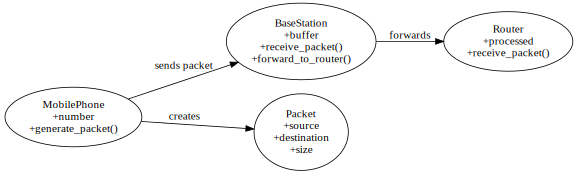

In [22]:
# ======================================
# Object-Oriented Example: Telecom System
# ======================================

# Stage 1: Object-Oriented Analysis (OOA)
# - Objects: MobilePhone, BaseStation, Router, Packet
# - Interactions: Phone -> BaseStation -> Router

# Stage 2: Object-Oriented Design (OOD)
# UML design visual at the end

# Stage 3: Object-Oriented Programming (OOP)
# Implement the design in Python

# -----------------------
# Step 1: Define Classes
# -----------------------

class Packet:
    """Represents data being transmitted in the network."""
    def __init__(self, source, destination, size):
        self.source = source
        self.destination = destination
        self.size = size  # in bytes

class MobilePhone:
    """Mobile phone that generates traffic."""
    def __init__(self, number):
        self.number = number

    def generate_packet(self, destination, size=100):
        return Packet(self.number, destination, size)

class BaseStation:
    """Base station forwards packets to the router."""
    def __init__(self, station_id):
        self.station_id = station_id
        self.buffer = []

    def receive_packet(self, packet):
        self.buffer.append(packet)

    def forward_to_router(self, router):
        while self.buffer:
            pkt = self.buffer.pop(0)
            router.receive_packet(pkt)

class Router:
    """Router processes packets and routes them."""
    def __init__(self, router_id):
        self.router_id = router_id
        self.processed = []

    def receive_packet(self, packet):
        self.processed.append(packet)

# -----------------------
# Step 2: Simulate System
# -----------------------

phone = MobilePhone("User_A")
bs = BaseStation("BS1")
router = Router("R1")

# Phone generates packets
for i in range(3):
    pkt = phone.generate_packet("Server_X", size=(i+1)*120)
    bs.receive_packet(pkt)

# Base station forwards to router
bs.forward_to_router(router)

# Show results
print("Packets processed by Router:")
for pkt in router.processed:
    print(f"{pkt.source} -> {pkt.destination}, Size: {pkt.size} bytes")

# -----------------------
# Step 3: UML Diagram
# -----------------------
from graphviz import Digraph

dot = Digraph("TelecomSystem", format="png")
dot.attr(rankdir="LR", size="8")

# Nodes
dot.node("Phone", "MobilePhone\n+number\n+generate_packet()")
dot.node("BS", "BaseStation\n+buffer\n+receive_packet()\n+forward_to_router()")
dot.node("Router", "Router\n+processed\n+receive_packet()")
dot.node("Packet", "Packet\n+source\n+destination\n+size")

# Edges
dot.edge("Phone", "Packet", label="creates")
dot.edge("Phone", "BS", label="sends packet")
dot.edge("BS", "Router", label="forwards")

# Render UML diagram (shows inline in Jupyter)
dot.render("telecom_system", view=False)
dot


#  Objects and Classes

---

## 1. Introduction
- In **Object-Oriented Programming (OOP)**, everything revolves around **objects**.  
- An **object** is a combination of two things:  
  - **Data (attributes/state)** → describes what the object is.  
  - **Behaviors (methods/actions)** → describes what the object does.  

Objects help engineers represent **real-world or abstract entities** in software.  
This is particularly important in **telecommunication and information engineering**, where systems are complex, and modeling them as interacting objects makes **analysis and design manageable**.  

---

## 2. What is a Class?
- A **class** is a **blueprint or template** that defines the structure and behavior of objects.  
- **Objects are instances of a class.**  

A class specifies:  
- **Attributes (data members)** → the properties of the object.  
- **Behaviors (methods)** → the actions the object can perform.  

### Example (Real Life):
- **Class**: MobilePhone  
- **Objects**: Samsung Galaxy S22, iPhone 14 Pro  
- Both share attributes like **IMEI, battery_level**, and behaviors like **make_call()** or **send_message()**.  

---

## 3. Example: Fruit Farm Inventory
To simplify the concept, consider a fruit farm managing **apples and oranges**:  
- **Objects**: Apple, Orange, Basket, Barrel  
- Each fruit has:  
  - Attributes (e.g., weight, color)  
  - Behaviors (e.g., eat, peel)  

- **Classes**: Apple, Orange, Basket, Barrel  
- **Objects**: 3 individual apples on a table, 5 oranges in a basket  

 This example mirrors **engineering practice**, where classes may represent **devices, users, or signals**.  

---

## 4. Difference Between Objects and Classes
- **Class**: General definition (the blueprint).  
- **Object**: Concrete realization (the instance).  

### Analogy:
- **Blueprint for a router** → class.  
- **An actual Cisco Router in the lab** → object.  

---

## 5. Association Between Classes
- In OOP, **classes often interact**:  
  - A **Basket** contains Oranges.  
  - A **Barrel** stores Apples.  

This interaction is called **association**.  

---

## 6. Multiplicity (Cardinality)
- **Multiplicity** describes how many objects of one class can relate to objects of another:  
  - One Basket ↔ many Oranges.  
  -  One Barrel ↔ many Apples.  
  - Each fruit belongs to exactly **one container**.  

###  Telecom Analogy:
- One **BaseStation** serves many **MobilePhones**.  
- Each **MobilePhone** connects to exactly **one BaseStation** at a time.  

---

## 7. UML (Unified Modeling Language) Diagrams
- **UML** helps visualize the **structure of classes and their relationships**.  

###  Example:
- A line connects **Orange → Basket** (association).  
- Multiplicity added: one basket ↔ many oranges.  

###  Why UML?
- Managers: Understand system design quickly.  
- Programmers: Brainstorm design.  
- Engineers: Use for documentation and team discussions.  

Note: In **fast-paced, iterative development**, UML diagrams may become **outdated quickly**, so many teams use them **informally**.  

---

## 8. Engineering Relevance
For **telecommunication and information engineering**:  
- **Classes represent entities**: Router, BaseStation, Packet, User, Channel.  
- **Objects are specific instances**: Router R1, Packet P1, BaseStation BS1.  

###  Associations
- A **base station** serves many **mobile devices**.  
- A **packet** travels through many **routers**.  

###  Multiplicity
- One **packet** belongs to exactly one **transmission** at a time.  
- One **router** may forward **thousands of packets per second**.  

The same concepts that explain **apples and baskets** also apply to **routers and packets** in engineering systems.  

---
Always remember: **OOP is about modeling the real world.**  
Whether you are putting **oranges in baskets** or **packets through routers**, the principle is the same.  
- Objects **interact**  
- Classes **define structure**  
- Associations **describe relationships**  

Mastering this abstraction makes it possible to **simulate, analyze, and optimize complex telecommunication systems**.  


In [23]:

# --- Class Definitions (Blueprints) ---
class Apple:
    def __init__(self, weight, color="red"):
        self.weight = weight
        self.color = color
        self.container = None   # Barrel association

    def store_in(self, barrel):
        self.container = barrel
        barrel.add_apple(self)

    def __repr__(self):
        return f"Apple({self.weight}g, {self.color})"


class Orange:
    def __init__(self, weight, color="orange"):
        self.weight = weight
        self.color = color
        self.container = None   # Basket association

    def store_in(self, basket):
        self.container = basket
        basket.add_orange(self)

    def __repr__(self):
        return f"Orange({self.weight}g, {self.color})"


class Basket:
    def __init__(self):
        self.oranges = []

    def add_orange(self, orange):
        self.oranges.append(orange)

    def __repr__(self):
        return f"Basket({len(self.oranges)} oranges)"


class Barrel:
    def __init__(self):
        self.apples = []

    def add_apple(self, apple):
        self.apples.append(apple)

    def __repr__(self):
        return f"Barrel({len(self.apples)} apples)"


# --- Example Usage ---
if __name__ == "__main__":
    # Create containers
    basket1 = Basket()
    barrel1 = Barrel()

    # Create fruit objects
    orange1 = Orange(120)
    orange2 = Orange(150, color="greenish-orange")
    apple1 = Apple(200)
    apple2 = Apple(180, color="yellow")

    # Store fruit in containers (association)
    orange1.store_in(basket1)
    orange2.store_in(basket1)
    apple1.store_in(barrel1)
    apple2.store_in(barrel1)

    # Display state of objects
    print("Objects in the system:")
    print(orange1, "in", orange1.container)
    print(orange2, "in", orange2.container)
    print(apple1, "in", apple1.container)
    print(apple2, "in", apple2.container)

    print("\nContainers summary:")
    print(basket1)
    print(barrel1)


Objects in the system:
Orange(120g, orange) in Basket(2 oranges)
Orange(150g, greenish-orange) in Basket(2 oranges)
Apple(200g, red) in Barrel(2 apples)
Apple(180g, yellow) in Barrel(2 apples)

Containers summary:
Basket(2 oranges)
Barrel(2 apples)


#  Specifying Attributes and Behaviors

---

## 1. Objects, Data, and Behaviors
- **Objects are instances of classes.**  
- Each object carries:  
  - **Attributes (data/properties)** → what the object is (its state).  
  - **Behaviors (methods/actions)** → what the object does (its actions).  

###  Telecom Example
- **MobilePhone object**  
  - Attributes: IMEI, battery_level, network_type  
  - Behaviors: make_call(), send_sms(), connect_to_base_station()  

---

## 2. Data Describes Objects
- **Attributes define the unique characteristics** of an object.  

###  Fruit Example
- Every **Orange object** has: weight, color, orchard_origin.  
- Each orange instance may differ in **weight**, but all oranges share the same attributes.  

###  Telecom Example
- Every **Packet object** has: size, source_address, destination_address.  
- Each packet differs in **content**, but follows the same structure.  

###  Attribute Types
- **Primitives**: integers (weight), floats (signal_strength), strings (user_name).  
- **Objects**: one object can reference another (e.g., an Orange references the Basket it’s in).  
- In design, attribute types are often kept **generic** until implementation.  

---

## 3. Behaviors Are Actions
- **Behaviors (methods)** define how objects **interact**.  
- Methods can:  
  - Take **parameters (inputs)**  
  - Return **values (outputs)**  
  - Modify object attributes (**change state**)  

###  Fruit Example
- **Orange**  
  - pick(basket) → places orange in a basket  
  - squeeze() → removes orange from basket and returns juice volume  
- **Basket**  
  - sell() → marks basket as sold  
  - discard() → marks basket contents as spoiled  

###  Telecom Example
- **MobilePhone**  
  - make_call(number) → initiates a call  
  - connect(base_station) → registers with a base station  
- **BaseStation**  
  - handover(mobile) → transfers mobile to another base station  
  - allocate_channel() → assigns frequency/time slot  

---

## 4. Attributes + Behaviors = Interaction
- A system of objects is defined by classes that specify both:  
  - What **data** the object holds.  
  - What **actions** it can perform.  

Interactions occur when one object’s **method** affects another object’s **data**.  

### Telecom Example
- A MobilePhone calling another requires cooperation among multiple objects:  
  - MobilePhone.make_call()  
  - BaseStation.allocate_channel()  
  - Packet objects created and transmitted over the Network  

---

## 5. Why This Matters in Engineering
- In telecom/IT systems, mapping **real-world entities** (users, devices, packets, routers) to objects with **attributes + behaviors** makes systems:  
  - Modular  
  - Reusable  
  - Scalable  

### Engineering Applications
- **Simulations**: packet traffic models, call handovers  
- **Deployments**: 4G/5G network software  

---

##
Understanding how to **specify attributes and behaviors** is crucial — this is how we model both the **data** and the **dynamics** of engineering systems.  
Without this, our models would just be **static diagrams without life**.  


In [24]:
# ----------------------------
# Fruit Farm Example
# ----------------------------

class Orange:
    def __init__(self, weight, orchard):
        self.weight = weight  # attribute
        self.orchard = orchard
        self.basket = None  # reference attribute

    def pick(self, basket):
        """Place the orange in a basket"""
        self.basket = basket
        basket.oranges.append(self)

    def squeeze(self):
        """Return juice amount and remove from basket"""
        juice = self.weight * 0.5  # 50% of weight as juice
        if self.basket:
            self.basket.oranges.remove(self)
            self.basket = None
        return juice


class Basket:
    def __init__(self, location):
        self.location = location
        self.oranges = []

    def sell(self):
        count = len(self.oranges)
        self.oranges.clear()
        return f"Sold {count} oranges from basket at {self.location}"

    def discard(self):
        count = len(self.oranges)
        self.oranges.clear()
        return f"Discarded {count} spoiled oranges"


# ----------------------------
# Telecom Example
# ----------------------------

class Packet:
    def __init__(self, size, source, destination):
        self.size = size
        self.source = source
        self.destination = destination


class MobilePhone:
    def __init__(self, number):
        self.number = number
        self.base_station = None

    def connect(self, base_station):
        self.base_station = base_station
        base_station.register_mobile(self)

    def make_call(self, destination_number):
        if self.base_station:
            return self.base_station.route_call(self.number, destination_number)
        return "No connection available"


class BaseStation:
    def __init__(self, name):
        self.name = name
        self.mobiles = {}

    def register_mobile(self, mobile):
        self.mobiles[mobile.number] = mobile

    def route_call(self, src_number, dest_number):
        if dest_number in self.mobiles:
            return f"Call connected between {src_number} and {dest_number} via {self.name}"
        else:
            return f"Destination {dest_number} not found at {self.name}"


# ----------------------------
# DEMONSTRATION
# ----------------------------

print("=== Fruit Farm Demo ===")
basket = Basket("Warehouse A")
orange1 = Orange(weight=150, orchard="North Field")
orange2 = Orange(weight=120, orchard="South Field")

orange1.pick(basket)
orange2.pick(basket)
print(f"Basket now has {len(basket.oranges)} oranges.")

juice = orange1.squeeze()
print(f"Squeezed {juice}ml juice from an orange.")
print(basket.sell())

print("\n=== Telecom Demo ===")
station = BaseStation("BaseStation-1")
phone1 = MobilePhone("0712345678")
phone2 = MobilePhone("0798765432")

phone1.connect(station)
phone2.connect(station)

print(phone1.make_call("0798765432"))
print(phone2.make_call("0712345678"))
print(phone1.make_call("0700000000"))  # non-existent number


=== Fruit Farm Demo ===
Basket now has 2 oranges.
Squeezed 75.0ml juice from an orange.
Sold 1 oranges from basket at Warehouse A

=== Telecom Demo ===
Call connected between 0712345678 and 0798765432 via BaseStation-1
Call connected between 0798765432 and 0712345678 via BaseStation-1
Destination 0700000000 not found at BaseStation-1


#  Hiding Details and Creating the Public Interface

---

## 1. Why Public Interfaces Matter
- In object-oriented design, the **public interface** is what other objects (or external code) use to interact with a given object.  
- It consists of:  
  - Attributes that can be **read/updated externally**  
  - Methods that can be **invoked externally**  

###  Example: Remote Control
- **Buttons = methods** (volume up, change channel, power on/off)  
- You don’t need to know if the TV uses **cable, satellite, or internet**.  
- The complexity inside the TV is **hidden** — you only interact via the remote.  

---

## 2. Information Hiding vs Encapsulation
- **Encapsulation** → bundling data + behavior into a single object (“capsule”).  
- **Information Hiding** → restricting access to an object’s inner details.  

###  Analogy
- A **time capsule** is encapsulation.  
- If it’s **sealed and buried**, it’s also hidden.  

###  In Practice
- The distinction is often minor in design.  
- Many use the terms **interchangeably**.  
- In **Python**, strict hiding isn’t enforced — but naming conventions (like `_attribute`) imply privacy.  

---

## 3. The Public Interface Must Be Stable
- **Why stability matters**:  
  - Internal changes → client code still works.  
  - Public interface changes → client code breaks.  

###  Design Guideline
- Keep it **simple**.  
- Design for **ease of use**, not ease of coding.  

---

## 4. Abstraction: Ignoring Irrelevant Details
- **Abstraction** = working at the right level of detail.  

### Driving Analogy
- Driver → only needs steering, accelerator, brakes.  
- Mechanic → works with engine and subsystems.  

###  Software Analogy
- Users of a class shouldn’t see irrelevant details.  
- **Public interface = abstraction layer**  
- **Private details = implementation**  

---

## 5. Practical Naming Conventions
- **Classes** → nouns (`Car`, `Television`, `User`, `Basket`)  
- **Methods** → verbs (`drive()`, `change_channel()`, `login()`, `add_item()`)  
- **Attributes** → adjectives/nouns (`color`, `weight`, `username`, `capacity`)  

---

## 6. Golden Rule of Interface Design
 Imagine you are the object:  
- Only **reveal** what you want others to know.  
- Only **allow** actions you want others to perform.  

###  Example: BankAccount
- Expose → `deposit(amount)`, `withdraw(amount)`  
- Never allow direct modification of `balance` from outside.  
---
**Public interfaces are promises.**  
Once you expose them, changing them becomes costly.  
Hide the messy details, keep the surface clean, and let other objects interact with you in the **simplest, most intuitive way**.  


In [25]:
#  Public Interface & Information Hiding

class Television:
    def __init__(self):
        # Internal details (hidden via naming convention)
        self._power = False
        self._volume = 10
        self._channel = 1

    # Public Interface (remote control methods)
    def power(self):
        """Toggle power ON/OFF."""
        self._power = not self._power
        state = "ON" if self._power else "OFF"
        print(f"TV is now {state}")

    def change_channel(self, channel):
        """Change the channel (only if TV is on)."""
        if self._power:
            self._channel = channel
            print(f"Channel set to {self._channel}")
        else:
            print("Cannot change channel. TV is OFF.")

    def volume_up(self):
        """Increase volume (0-100)."""
        if self._power and self._volume < 100:
            self._volume += 1
            print(f"Volume: {self._volume}")

    def volume_down(self):
        """Decrease volume (0-100)."""
        if self._power and self._volume > 0:
            self._volume -= 1
            print(f"Volume: {self._volume}")

    # Public summary method (abstraction)
    def status(self):
        """Report the current state of the TV."""
        state = "ON" if self._power else "OFF"
        print(f"TV Status -> Power: {state}, Channel: {self._channel}, Volume: {self._volume}")


# --- Demonstration ---
tv = Television()

print("\n--- Trying to use the TV ---")
tv.change_channel(5)   # Should fail because TV is OFF
tv.power()             # Turn TV ON
tv.change_channel(5)   # Now works
tv.volume_up()
tv.volume_up()
tv.volume_down()
tv.status()

# --- Hiding details ---
print("\n--- Bypassing the public interface (not recommended) ---")
tv._volume = 999  # Directly modifying private data (bad practice!)
tv.status()



--- Trying to use the TV ---
Cannot change channel. TV is OFF.
TV is now ON
Channel set to 5
Volume: 11
Volume: 12
Volume: 11
TV Status -> Power: ON, Channel: 5, Volume: 11

--- Bypassing the public interface (not recommended) ---
TV Status -> Power: ON, Channel: 5, Volume: 999


# Composition in Object-Oriented Design

---

## 1. Introduction
- In **object-oriented programming (OOP)**, systems are designed as groups of interacting objects.  
- To manage complexity, we use **abstraction** — focusing only on details that matter at each level.  
- One way to achieve abstraction is through **composition**.  

---

## 2. What is Composition?
- **Composition** = collecting several objects together to create a new, higher-level object.  
- Often used when **one object is part of another object**.  

###  Example: Car
- A Car is composed of:  
  - Engine  
  - Transmission  
  - Headlights  
  - Other parts  

- Each part may itself be composed of smaller parts (e.g., engine → pistons, valves, crankshaft).  

### Abstraction Layers
- **Top level** → driver interacts with the Car.  
- **Deeper level** → mechanic interacts with the engine or brakes.  

---

## 3. Composition vs Aggregation
###  Composition
- The **lifetime of the part depends on the whole**.  
- Example → A Position is part of a Chess Board.  
  - If the board is destroyed, the positions cease to exist.  

###  Aggregation
- The part can **exist independently of the whole**.  
- Example → Chess Pieces in a Chess Set.  
  - They can exist separately or be reused with another board.  
**Composition = "has-a" + ownership**  
**Aggregation = "has-a" without strict ownership**  

---

## 4. Example: Chess Game
A computerized chess game:  

- **Chess Set** is composed of:  
  - A **Board** (which itself contains 64 Positions).  
  - **32 Pieces** (16 for each player).  

- **Players** interact with the Chess Set by making moves.  
- **Pieces** move across Positions on the Board.  

### Relationships
- **Board** → composed of Positions (**composition**).  
- **Chess Set** → aggregates Pieces (**aggregation**).  

---

## 5. Why Use Composition?
- Creates levels of **abstraction** → easier to manage complexity.  
- Provides **modularity** → parts can be reused or replaced.  
- Models **real-world relationships** naturally (e.g., a car has an engine, a board has squares).  

---

In [26]:
# Composition & Aggregation Example: Chess Game

class Position:
    """Represents a square on the chess board."""
    def __init__(self, row, col):
        self.row = row
        self.col = col
        self.piece = None  # can hold a piece or remain empty

    def __repr__(self):
        return f"({self.row}, {self.col})"


class Board:
    """Board is COMPOSED of 64 Positions (composition)."""
    def __init__(self):
        self.positions = [Position(row, col) for row in range(8) for col in range(8)]

    def get_position(self, row, col):
        for pos in self.positions:
            if pos.row == row and pos.col == col:
                return pos
        return None

    def __repr__(self):
        return f"Board with {len(self.positions)} positions"


class Piece:
    """Base class for chess pieces."""
    def __init__(self, name, color):
        self.name = name
        self.color = color
        self.position = None

    def move_to(self, new_position):
        if self.position:
            self.position.piece = None  # remove from old position
        new_position.piece = self
        self.position = new_position

    def __repr__(self):
        return f"{self.color} {self.name}"


class ChessSet:
    """
    ChessSet AGGREGATES Pieces (aggregation)
    and COMPOSES a Board (composition).
    """
    def __init__(self):
        self.board = Board()  # composition
        self.pieces = []      # aggregation

    def add_piece(self, piece, row, col):
        pos = self.board.get_position(row, col)
        if pos:
            piece.move_to(pos)
            self.pieces.append(piece)

    def show_setup(self):
        for piece in self.pieces:
            print(f"{piece} at {piece.position}")


# --------------------------
# Demo: Composition + Aggregation in action
# --------------------------

# Create chess set
chess_set = ChessSet()

# Create some pieces (aggregation: they can exist independently)
white_king = Piece("King", "White")
black_queen = Piece("Queen", "Black")

# Add pieces to the chess set
chess_set.add_piece(white_king, 0, 4)  # White King at (0,4)
chess_set.add_piece(black_queen, 7, 3) # Black Queen at (7,3)

# Show setup
chess_set.show_setup()

# Move a piece
print("\nAfter moving the Queen:")
new_pos = chess_set.board.get_position(5, 3)
black_queen.move_to(new_pos)

chess_set.show_setup()


White King at (0, 4)
Black Queen at (7, 3)

After moving the Queen:
White King at (0, 4)
Black Queen at (5, 3)


#  Inheritance in Object-Oriented Design

---

## 1. Recap of Object Relationships
So far, we have studied:

- **Association** → Objects interact with each other  
  _(e.g., Player ↔ ChessSet)_.  
- **Composition** → One object is part of another  
  _(e.g., Board is composed of Positions)_.  
- **Aggregation** → One object uses another but they can exist independently  
  _(e.g., ChessSet aggregates Pieces)_.  

But sometimes, these aren’t enough.  
 Example: A **Player** could be a **Human** or an **AI Program**.  
Here, **AI is a type of Player** → this introduces **Inheritance**.  

---

## 2. What is Inheritance?
- **Inheritance** allows one class (**child/subclass**) to acquire the **attributes and methods** of another class (**parent/superclass**).  

###  Terms
- **Parent/Base Class** → General definition _(e.g., Piece)_.  
- **Child/Derived Class** → More specific type _(e.g., Pawn, Rook)_.  

###  Example: Chess
- All pieces (Pawn, Rook, Knight, Bishop, Queen, King) **inherit** from the **Piece** class.  
- They share attributes _(color, position)_.  
- They differ in **behavior** _(how they move)_.  

---

## 3. Abstract Classes & Polymorphism
- Sometimes, the **parent class** only defines a contract, not full implementation.  

### Example
- **Piece** declares `move()` but doesn’t define how.  
- Each subclass (Knight, Rook, etc.) provides its own move logic.  

### Polymorphism
- **Polymorphism** = treat different subclasses as if they were the same type.  
- Example: The Board calls `move()` on any Piece without knowing if it’s a Queen, Knight, or Pawn.  

###  Telecom Analogy
- Think of **protocol stacks**:  
  - A base protocol defines standard rules (like Piece defines move).  
  - Implementations (TCP, UDP) provide their own behavior.  
  - A router just calls `send()` → polymorphism decides how (TCP vs UDP).  

---

## 4. Duck Typing (Python-specific)
- In Python, explicit inheritance isn’t always required.  
- If an object “acts like a duck” (e.g., has `move()`), it can be used like a Piece.  
- This flexibility is powerful in **simulations** and **protocol emulators** in telecom.  

---

## 5. Multiple Inheritance
- A class can inherit from **more than one parent**.  
- Useful for **hybrid behavior** _(e.g., a device that acts as Scanner + Faxer)_.  

Problem: If both parents define the same method → **Diamond Problem**.  
Best practice: Avoid multiple inheritance unless it models the problem naturally.  

---

## 6. Best Practices in Using Inheritance
- Use inheritance only when there is a clear **“is-a” relationship**:  
  - Knight **is a** Piece  
  - Player **is a** Human/AI   
  - Basket **is a** Container  (better to use **composition**).  

- Don’t use inheritance just to share code → prefer **composition** if no strong “is-a” exists.  

---

## 7. Case Study: Chess Game
- **Superclass**: Piece → defines attributes (color, position) + abstract method (move).  
- **Subclasses**: Pawn, Rook, Bishop, Knight, Queen, King.  
- **Board**: Calls `move()` on any piece without caring which type → **Polymorphism** in action.  

---

## Key Takeaway
- **Inheritance** provides:  
  - **Abstraction** → hide general rules in parent.  
  - **Polymorphism** → treat many objects through one interface.  
  - **Code Reuse** → avoid repetition.  

- Apply it carefully: only where subclasses are **specialized versions** of a superclass.  


In [27]:
from abc import ABC, abstractmethod

# Base (Abstract) Class
class Piece(ABC):
    def __init__(self, color, position):
        self.color = color   # "White" or "Black"
        self.position = position  # (row, col)

    @abstractmethod
    def move(self):
        """Abstract method: must be implemented by subclasses"""
        pass

    def __repr__(self):
        return f"{self.__class__.__name__}({self.color}, at {self.position})"


# Subclasses (inherit from Piece)

class Pawn(Piece):
    def move(self):
        return "Moves forward by 1 square (2 if first move)"


class Rook(Piece):
    def move(self):
        return "Moves any number of squares horizontally or vertically"


class Bishop(Piece):
    def move(self):
        return "Moves any number of squares diagonally"


class Knight(Piece):
    def move(self):
        return "Moves in an L-shape: 2 squares in one direction, then 1 perpendicular"


class Queen(Piece):
    def move(self):
        return "Moves any number of squares in any direction"


class King(Piece):
    def move(self):
        return "Moves 1 square in any direction"


# Demonstration of Polymorphism
def show_piece_moves(pieces):
    for piece in pieces:
        print(f"{piece}: {piece.move()}")


if __name__ == "__main__":
    # Create different pieces
    pieces = [
        Pawn("White", (1, 0)),
        Rook("Black", (0, 0)),
        Bishop("White", (2, 0)),
        Knight("Black", (0, 1)),
        Queen("White", (0, 3)),
        King("Black", (0, 4)),
    ]

    # Show polymorphism: each responds differently to move()
    show_piece_moves(pieces)


Pawn(White, at (1, 0)): Moves forward by 1 square (2 if first move)
Rook(Black, at (0, 0)): Moves any number of squares horizontally or vertically
Bishop(White, at (2, 0)): Moves any number of squares diagonally
Knight(Black, at (0, 1)): Moves in an L-shape: 2 squares in one direction, then 1 perpendicular
Queen(White, at (0, 3)): Moves any number of squares in any direction
King(Black, at (0, 4)): Moves 1 square in any direction


#  End Takeaways
---

##  Object-Oriented Design & Programming
- **Object-Oriented Design (OOD)** overlaps with **programming (OOP)** — not a separate step.  
- Core principles: **encapsulation, abstraction, inheritance, polymorphism, composition**.  
- These map directly to **telecommunication systems** (routers, mobile phones, base stations, packets).  
- **UML** is a helpful visualization tool, but the real goal is **clarity, modularity, and reusability**.  

---

##  Object-Oriented Development Stages
- **Object** = data + behavior.  
- **OOA** → find what objects exist + what they must do.  
- **OOD** → define structure + interactions.  
- **OOP** → implement design in code.  
- **Iterative development** → refine continuously (like optimizing telecom protocols).  

---

##  Objects and Classes
- **Object** = data + behaviors.  
- **Class** = blueprint for creating objects.  
- **Objects** = instances of classes.  
- **Associations** → define relationships.  
- **Multiplicity** → shows how many objects participate.  
- **UML** → communication tool for visualization.  

---

##  Encapsulation & Interfaces
- **Encapsulation** → bundle data + methods.  
- **Information Hiding** → keep internals private.  
- **Public Interface** → accessible methods/attributes.  
- **Abstraction** → focus only on the relevant details.  

---

## Composition & Aggregation
- **Composition** → part’s existence depends on the whole.  
- **Aggregation** → part can exist independently.  
- Use **composition** for abstraction layers.  
- Both are often implemented as **attributes in a class**.  
- Distinction helps in **design discussions** and **object lifetime reasoning**.  

---
Mastering OOP principles allows engineers to model, simulate, and optimize **complex telecom systems**. Whether it’s **packets in routers** or **oranges in baskets**, the principles remain the same — objects, classes, relationships, and abstraction.  
